In [1]:
import sys
import pickle
from scipy import signal
from scipy import stats
import numpy as np
from sklearn.model_selection import ShuffleSplit
import math
from collections import OrderedDict


import matplotlib.pyplot as plt




In [7]:
np.average([0.843, 0.482, 0.829, 0.538, 0.435, 0.355, 0.865, 0.793, 0.697])

0.6485555555555557

In [25]:
svm = np.array([82.29, 60.42, 82.99, 72.57, 60.07, 44.10, 86.11, 77.08, 75, 71.18])
c2cm = np.array([87.5, 65.28, 90.28, 66.67, 62.5, 45.49, 89.58, 83.33, 79.51, 74.46])
cw = np.array([86.11, 60.76, 86.81, 67.36, 62.50, 45.14, 90.63, 81.25, 77.08, 73.07])
c2d_old = np.array([0.876 , 0.61 , 0.864 , 0.607 , 0.533 ,  0.519,  0.874  ,0.838 , 0.781, 0.7225]) *100
c2d = np.array([88.24, 61.32, 87.08, 65.51, 58.07, 51.56, 89.95, 84.53, 77.26, 73.72])

svm_kappa = np.array([0.764, 0.472, 0.773, 0.634, 0.468, 0.255, 0.815, 0.694, 0.667, 0.616])
c2cm_kappa = np.array([0.833, 0.537, 0.87, 0.556, 0.5, 0.273, 0.861, 0.778, 0.727, 0.659])
cw_kappa = np.array([0.815, 0.477, 0.824, 0.565, 0.5, 0.269, 0.875, 0.75, 0.694, 0.641])
c2d_kappa_old = np.array([0.835, 0.478, 0.82, 0.473, 0.368, 0.358, 0.83, 0.783, 0.71, 0.628])
c2d_kappa = np.array([0.843, 0.482, 0.829, 0.538, 0.435, 0.355, 0.865, 0.793, 0.697, 0.649])
orig_kappa = np.array([0.674, 0.417, 0.745, 0.481, 0.398, 0.273, 0.773, 0.755, 0.606, 0.569])

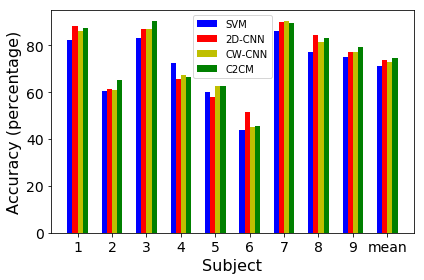

In [23]:
#fig, ax = plt.subplots()
n_groups = 10
index = np.arange(n_groups) + 1
bar_width = 0.15

rects1 = plt.bar(index-1.5*bar_width, svm, bar_width,color='b',label='SVM')
rects2 = plt.bar(index-0.5*bar_width, c2d, bar_width,color='r',label='2D-CNN')
rects3 = plt.bar(index+0.5*bar_width, cw, bar_width,color='y',label='CW-CNN')
rects4 = plt.bar(index+1.5*bar_width, c2cm, bar_width,color='g',label='C2CM')



plt.xlabel('Subject', fontsize = 16)
plt.ylabel('Accuracy (percentage)', fontsize = 16)
plt.xticks(index, ('1', '2', '3', '4', '5', '6', '7', '8', '9', 'mean'), fontsize = 14)
plt.yticks(fontsize  =14)
plt.legend(fontsize = 10)

plt.tight_layout()


plt.savefig('D:\\Diamond\\pics\\current_results\\percnt_acc.jpg', dpi = 800)
plt.show()

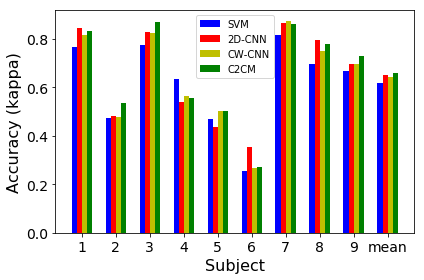

In [24]:
#fig, ax = plt.subplots()
n_groups = 10
index = np.arange(n_groups) + 1
bar_width = 0.15

rects1 = plt.bar(index-1.5*bar_width, svm_kappa, bar_width,color='b',label='SVM')
rects2 = plt.bar(index-0.5*bar_width, c2d_kappa, bar_width,color='r',label='2D-CNN')
rects3 = plt.bar(index+0.5*bar_width, cw_kappa, bar_width,color='y',label='CW-CNN')
rects4 = plt.bar(index+1.5*bar_width, c2cm_kappa, bar_width,color='g',label='C2CM')


plt.xlabel('Subject', fontsize = 16)
plt.ylabel('Accuracy (kappa)', fontsize = 16)
plt.xticks(index, ('1', '2', '3', '4', '5', '6', '7', '8', '9','mean'), fontsize = 14)
plt.yticks(fontsize  =14)
plt.legend(fontsize = 10)

plt.tight_layout()

plt.savefig('D:\\Diamond\\pics\\current_results\\kappa_acc.jpg', dpi = 800)
plt.show()


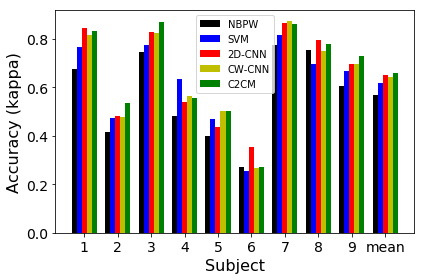

In [29]:
#fig, ax = plt.subplots()
n_groups = 10
index = np.arange(n_groups) + 1
bar_width = 0.15

rects0 = plt.bar(index-2*bar_width, orig_kappa, bar_width,color='k',label='NBPW')
rects1 = plt.bar(index-1*bar_width, svm_kappa, bar_width,color='b',label='SVM')
rects2 = plt.bar(index-0*bar_width, c2d_kappa, bar_width,color='r',label='2D-CNN')
rects3 = plt.bar(index+1*bar_width, cw_kappa, bar_width,color='y',label='CW-CNN')
rects4 = plt.bar(index+2*bar_width, c2cm_kappa, bar_width,color='g',label='C2CM')


plt.xlabel('Subject', fontsize = 16)
plt.ylabel('Accuracy (kappa)', fontsize = 16)
plt.xticks(index, ('1', '2', '3', '4', '5', '6', '7', '8', '9','mean'), fontsize = 14)
plt.yticks(fontsize  =14)
plt.legend(fontsize = 10)

plt.tight_layout()

plt.savefig('D:\\Diamond\\pics\\current_results\\kappa_acc1.jpg', dpi = 800)
plt.show()


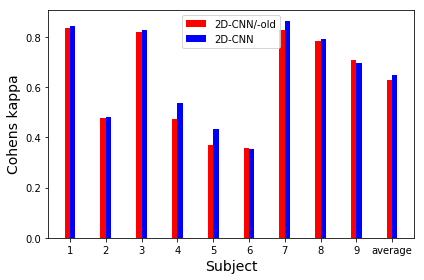

In [14]:
#fig, ax = plt.subplots()
n_groups = 10
index = np.arange(n_groups) + 1
bar_width = 0.15

rects2 = plt.bar(index-0.5*bar_width, c2d_kappa_old, bar_width,color='r',label='2D-CNN/-old')
rects3 = plt.bar(index+0.5*bar_width, c2d_kappa, bar_width,color='b',label='2D-CNN')



plt.xlabel('Subject', fontsize = 14)
plt.ylabel('Cohens kappa', fontsize = 14)
plt.xticks(index, ('1', '2', '3', '4', '5', '6', '7', '8', '9', 'average'))
plt.legend(fontsize = 10)

plt.tight_layout()

#plt.savefig('E:\\Diamond\\bci_iv\\MODELS\\fbcsp_mibif_cnn\\2a\\AUTORUN_50sel\\kappa.jpg')
plt.show()


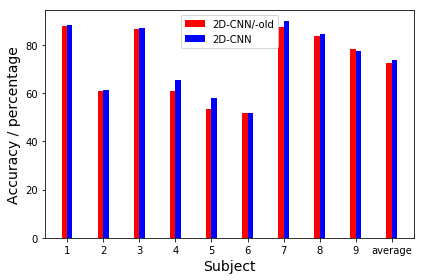

In [15]:
#fig, ax = plt.subplots()
n_groups = 10
index = np.arange(n_groups) + 1
bar_width = 0.15

rects2 = plt.bar(index-0.5*bar_width, c2d_old, bar_width,color='r',label='2D-CNN/-old')
rects3 = plt.bar(index+0.5*bar_width, c2d, bar_width,color='b',label='2D-CNN')



plt.xlabel('Subject', fontsize = 14)
plt.ylabel('Accuracy / percentage', fontsize = 14)
plt.xticks(index, ('1', '2', '3', '4', '5', '6', '7', '8', '9', 'average'))
plt.legend(fontsize = 10)

plt.tight_layout()

#plt.savefig('E:\\Diamond\\bci_iv\\MODELS\\fbcsp_mibif_cnn\\2a\\AUTORUN_50sel\\kappa.jpg')
plt.show()
